In [13]:
import pyreadr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime


In [2]:
result = pyreadr.read_r('../data/transactions.rds')

In [5]:
df = result[None]
transaction_label = df.columns.tolist()


['id', 'type', 'timestamp', 'user', 'userAlias', 'onBehalfOf', 'onBehalfOfAlias', 'pool', 'reserve', 'amount', 'amountUSD', 'amountETH', 'borrowRate', 'borrowRateMode', 'fromState', 'toState', 'liquidator', 'principalAmount', 'principalReserve', 'principalAmountUSD', 'principalAmountETH', 'collateralAmount', 'collateralReserve', 'collateralAmountUSD', 'collateralAmountETH', 'liquidatorAlias', 'priceInUsd', 'borrowRateModeTo', 'borrowRateModeFrom', 'stableBorrowRate', 'variableBorrowRate', 'target', 'totalFee', 'version', 'deployment']


In [11]:
data_type = df["type"]
borrow_type = df[df["type"] == "borrow"][["id", "timestamp"]]
borrow_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251342 entries, 0 to 251341
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         251342 non-null  object 
 1   timestamp  251342 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.8+ MB


In [14]:
# Convert timestamp to date
borrow_type["timestamp"] = pd.to_datetime(borrow_type["timestamp"], unit='s')
borrow_type["date"] = borrow_type["timestamp"].dt.date
borrow_type = borrow_type.drop(columns=["timestamp"])

borrow_type.head()


,id,date
0,0xc70f4c3f447f6a88e9fbb87ac1394b589e469ee57dda...,2020-12-01
1,0x1ee3db904548c16d2ed3572f3d9894652e031facc8fa...,2020-12-02
2,0x1e8f85330edc5005ead7a7ae8c418fbb64df726d4ffc...,2020-12-02
3,0x43136c7aba13c072bb19ed88f8eadf859f0bfb994b42...,2020-12-02
4,0xd96af0cf05a1e99125fe51ee7e27a1c96cf40ea6e596...,2020-12-02


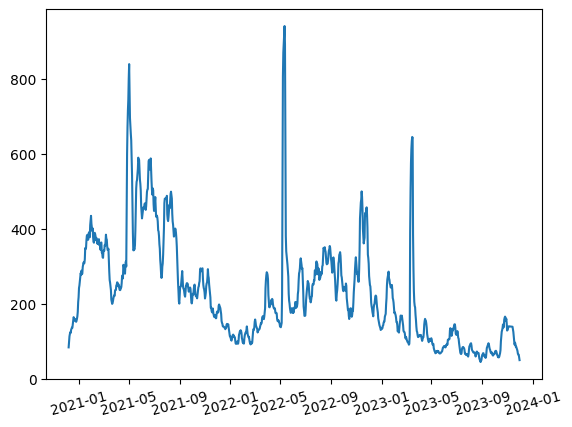

In [29]:
plt.plot(borrow_type["date"].value_counts().sort_index().rolling(window=7).mean())
# Make the X axis wider
plt.xticks(rotation=15)
plt.show()